## Observations and Insights

Three observations from the data:

1. Mice on the Ramicane and Capomulin drug regimens had significantly lower (> 10 mm3) average tumor volume compared to the other drug regimens.
2. There is a strong, positive correlation (0.84) between mouse weight and average tumor volume for mice in the Capomulin drug regimen.
3. Infubinol was the only drug regimen which contained an outlier outside of its IQR.

## Dependencies and starter code

In [195]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_data = "Resources/Mouse_data.csv"
study_results = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse = pd.read_csv(mouse_data)
study = pd.read_csv(study_results)

# Combine the data into a single dataset

df = mouse.merge(study, left_on='Mouse ID', right_on='Mouse ID', how = 'left')


## Summary statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

volumeStats = df.groupby('Drug Regimen').agg(['mean','median','var','std','sem'])

volumeStats = volumeStats[['Tumor Volume (mm3)']]

volumeStats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

Text(0.5, 1.0, 'Drug Regimen and Count')

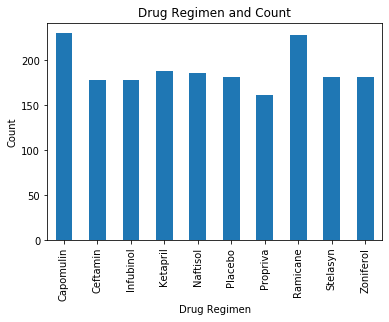

In [190]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

dataPoints = df.groupby('Drug Regimen').count()['Mouse ID']
dataPoints.sort_values()
plot = dataPoints.plot.bar()
plot.set_ylabel('Count')
plot.set_title('Drug Regimen and Count')

ValueError: too many values to unpack (expected 1)

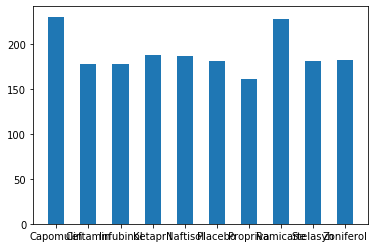

In [193]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

x_values = df['Drug Regimen'].unique()
x_values.sort()

plot2, = plt.bar(x_values, dataPoints, width=0.5, bottom=None, align='center')
plot2.set_xlabel('Drug Regimen')

## Pie plots

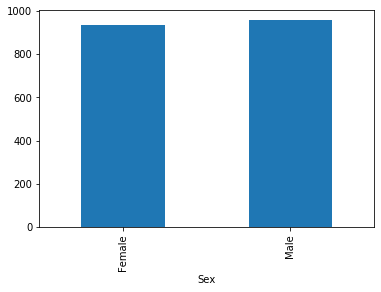

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender = df.groupby('Sex').count()['Mouse ID']
gender.plot.bar()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

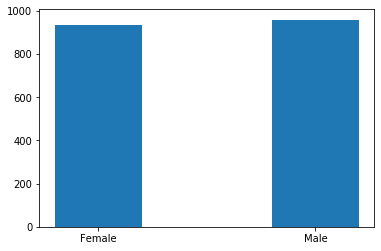

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

x_values2 = df['Sex'].unique()
x_values2.sort()
plt.bar(x_values2, gender, width=0.4, bottom=None, align='center')

## Quartiles, outliers and boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# Get the last timepoint for each mouse
maxTumor = df.groupby(["Mouse ID"]).max()
maxTumor = maxTumor.reset_index()

df2 = maxTumor[['Mouse ID','Timepoint']].merge(df, on=['Mouse ID','Timepoint'],how='left')

# Create iterable array to get specific drug regimens
array = ['Capomulin','Ramicane','Infubinol','Ceftamin']
df2 = df2.loc[df2['Drug Regimen'].isin(array)]

# Create IQR to find outliers
quartiles = df2['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Set upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

# Search for values outside of these bounds
outliers = df2.loc[(df2['Tumor Volume (mm3)'] < lower_bound) | (df2['Tumor Volume (mm3)'] > upper_bound)]

# Appears to be no outliers outside of bounds
outliers


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


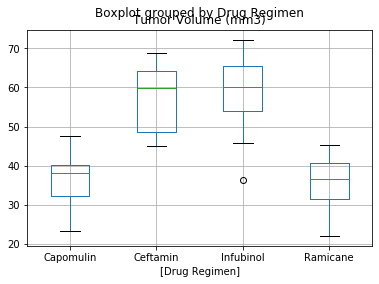

In [114]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# boxplot = df2.boxplot(column=['Drug Regimen'])
boxplot = df2.boxplot(column=['Tumor Volume (mm3)'], by=['Drug Regimen'])

## Line and scatter plots

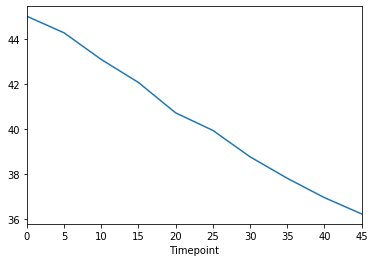

In [128]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulindf = df[df['Drug Regimen'] == 'Capomulin']

capomulin = capomulindf.groupby('Timepoint').mean()['Tumor Volume (mm3)']

capomulin.plot.line()


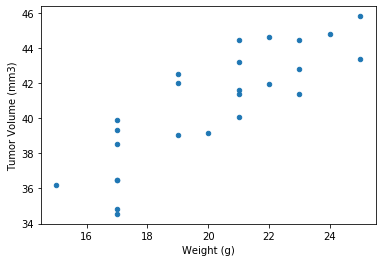

In [174]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

df3 = capomulindf.groupby(['Mouse ID', 'Weight (g)']).mean()['Tumor Volume (mm3)'].to_frame()

# Reset index to turn columns back to names
df3 = df3.reset_index()

df3.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)')

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84.


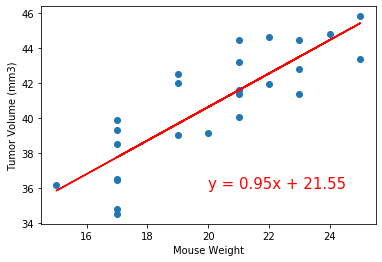

In [183]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr = round(st.pearsonr(df3['Weight (g)'],df3['Tumor Volume (mm3)'])[0],2)

print(f'The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr}.')

x_values = df3['Weight (g)']
y_values = df3['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

